In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

# Q1) Delivery_time -> Predict delivery time using sorting time 

In [2]:
d_time = pd.read_csv("C:/Users/HP/Downloads/delivery_time.csv")

In [3]:
d_time.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
d_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
# Column Rename
d_time = d_time.rename({'Delivery Time' : 'delivery_time','Sorting Time' : 'sorting_time'},axis = 1)

In [7]:
d_time.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [8]:
d_time.corr()   #corelation 

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

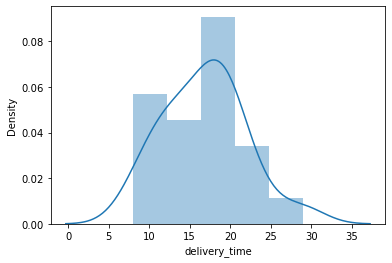

In [10]:
sns.distplot(d_time['delivery_time'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

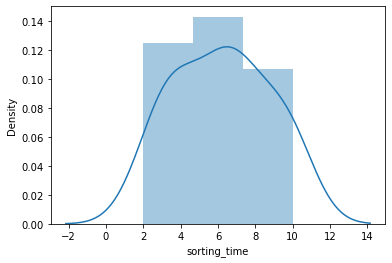

In [11]:
sns.distplot(d_time['sorting_time'])

## Fitting linear regression model

In [15]:
model = smf.ols('delivery_time~sorting_time', data = d_time).fit()

<AxesSubplot:xlabel='delivery_time', ylabel='sorting_time'>

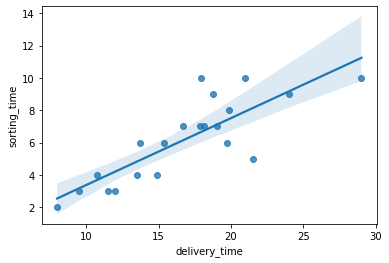

In [16]:
sns.regplot(x = 'delivery_time', y = 'sorting_time', data = d_time)

In [17]:
#Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [19]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

##  Predict for new data point¶

In [23]:
new_data=pd.Series([5,7])
new_data

0    5
1    7
dtype: int64

In [24]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,5
1,7


In [25]:
model.predict(data_pred)

0    14.827833
1    18.125873
dtype: float64

# Q2) Salary_hike -> Build a prediction model for Salary_hike

In [26]:
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf

In [27]:
Sdata = pd.read_csv("C:/Users/HP/Downloads/Salary_Data.csv")

In [28]:
Sdata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [29]:
Sdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [30]:
#Correlation
Sdata.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

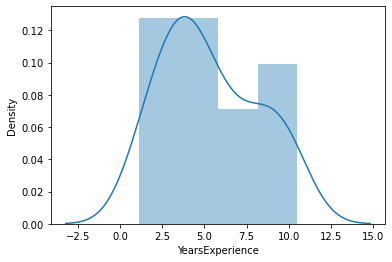

In [31]:
sns.distplot(Sdata['YearsExperience'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

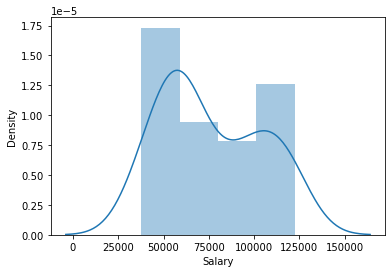

In [32]:
sns.distplot(Sdata['Salary'])

### Fitting Linear Regression Model

In [39]:
model = smf.ols('Salary~YearsExperience',data = Sdata).fit()

In [40]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [41]:
print(model.tvalues,'\n',model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

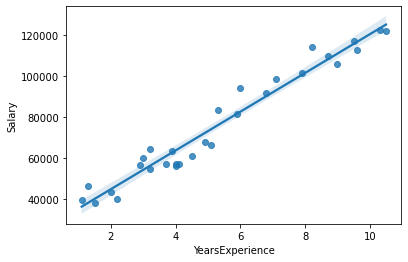

In [42]:
sns.regplot(x = 'YearsExperience', y = 'Salary', data = Sdata)

In [44]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# Predict for new data point

In [47]:
new_data = pd.Series([2,5])

In [50]:
new_data =pd.DataFrame(new_data,columns = ['YearsExperience'])

In [51]:
new_data

,YearsExperience
0,2
1,5


In [52]:
model.predict(new_data)

0    44692.124842
1    73042.011806
dtype: float64